# Experiment 1: Comparing the running time of quick,merge,selection,insertion bubblesort and heap sort





## Name-CHIRAG GUPTA  ROLL NO- 2501940006  Course- MCA(AI/ML)

## Github link- 

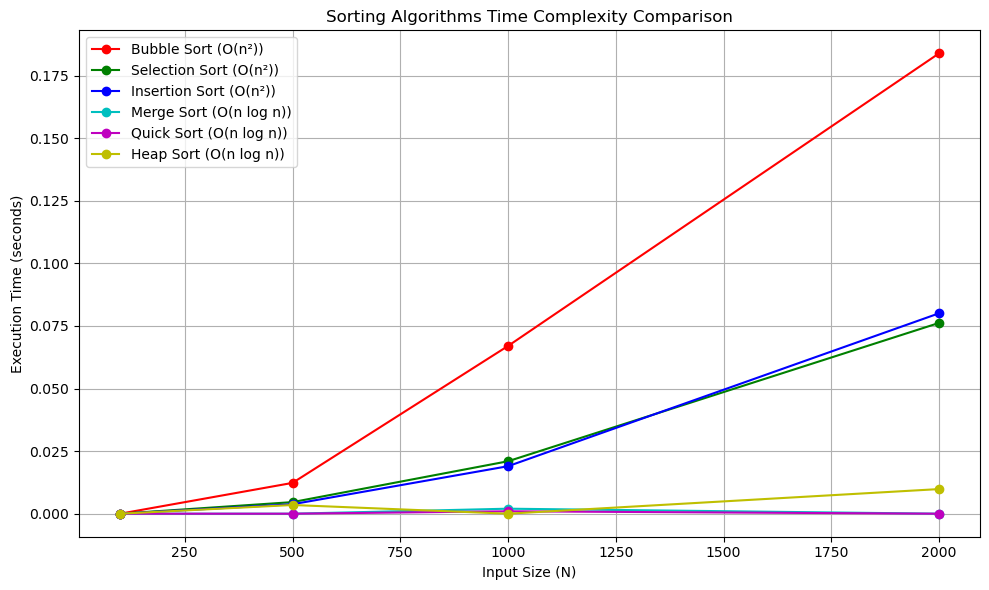

In [10]:
import random
import time
import matplotlib.pyplot as plt



def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)



def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

  
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)

    return arr


def measure_time(sort_func, arr):
    start = time.time()
    sort_func(arr.copy())
    end = time.time()
    return end - start

input_sizes = [100, 500, 1000, 2000]

bubble_times = []
selection_times = []
insertion_times = []
merge_times = []
quick_times = []
heap_times = []

for size in input_sizes:
    arr = random.sample(range(1, size * 10), size)

    bubble_times.append(measure_time(bubble_sort, arr))
    selection_times.append(measure_time(selection_sort, arr))
    insertion_times.append(measure_time(insertion_sort, arr))
    merge_times.append(measure_time(merge_sort, arr))
    quick_times.append(measure_time(quick_sort, arr))
    heap_times.append(measure_time(heap_sort, arr))



plt.figure(figsize=(10, 6))
plt.plot(input_sizes, bubble_times, 'o-r', label="Bubble Sort (O(n²))")
plt.plot(input_sizes, selection_times, 'o-g', label="Selection Sort (O(n²))")
plt.plot(input_sizes, insertion_times, 'o-b', label="Insertion Sort (O(n²))")
plt.plot(input_sizes, merge_times, 'o-c', label="Merge Sort (O(n log n))")
plt.plot(input_sizes, quick_times, 'o-m', label="Quick Sort (O(n log n))")
plt.plot(input_sizes, heap_times, 'o-y', label="Heap Sort (O(n log n))")

plt.title("Sorting Algorithms Time Complexity Comparison")
plt.xlabel("Input Size (N)")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()